In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

<h2>Análise Exploratória

In [2]:
data = pd.read_csv("raw/u.data", sep="\t", header=None, names=["user_id", "item_id", "rating", "timestamp"]).drop("timestamp", axis=1)
data

,user_id,item_id,rating
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1
...,...,...,...
99995,880,476,3
99996,716,204,5
99997,276,1090,1
99998,13,225,2


In [3]:
data.isna().sum()

user_id    0
item_id    0
rating     0
dtype: int64

<Axes: title={'center': 'Distribuição das médias de avaliação por filme'}, ylabel='Frequency'>

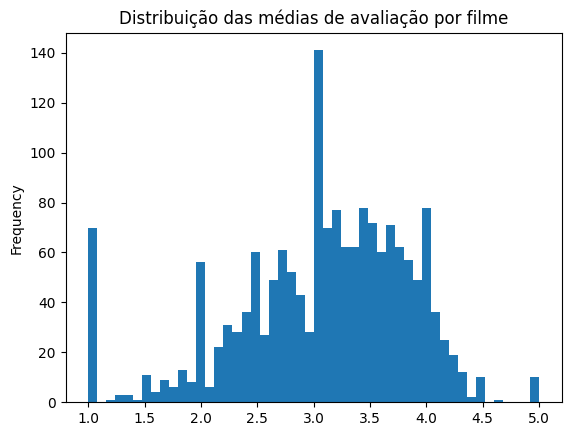

In [4]:
data.groupby('item_id')['rating'].mean().sort_values(ascending=False).plot(kind='hist', bins=50, title='Distribuição das médias de avaliação por filme')

<Axes: title={'center': 'Distribuição das médias de avaliação por usuário'}, ylabel='Frequency'>

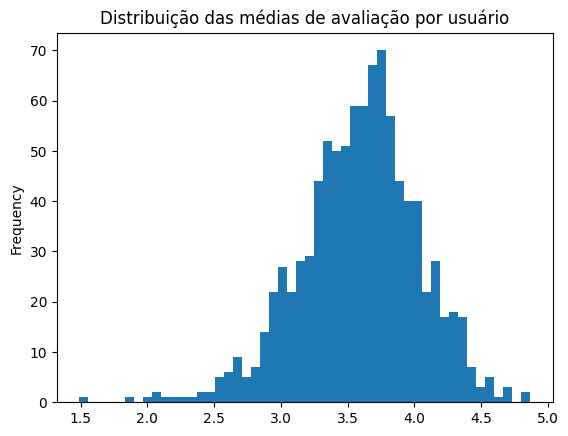

In [5]:
data.groupby('user_id')['rating'].mean().sort_values(ascending=False).plot(kind='hist', bins=50, title='Distribuição das médias de avaliação por usuário')

<h2>Tratando Dados

In [6]:
matriz = data.pivot_table(index='user_id', columns='item_id', values='rating')

In [7]:
matriz

item_id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
user_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,2.0,NaN,NaN,4.0,5.0,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,5.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
matriz = matriz.apply(lambda col: col.fillna(col.mean()), axis=0)
matriz

item_id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
user_id,,,,,,,,,,,,,,,,,,,,,
1,5.000000,3.000000,4.000000,3.000000,3.000000,5.000000,4.000000,1.000000,5.000000,3.000000,...,3.0,4.0,3.0,2.0,3.0,1.0,3.0,2.0,3.0,3.0
2,4.000000,3.206107,3.033333,3.550239,3.302326,3.576923,3.798469,3.995434,3.896321,2.000000,...,3.0,4.0,3.0,2.0,3.0,1.0,3.0,2.0,3.0,3.0
3,3.878319,3.206107,3.033333,3.550239,3.302326,3.576923,3.798469,3.995434,3.896321,3.831461,...,3.0,4.0,3.0,2.0,3.0,1.0,3.0,2.0,3.0,3.0
4,3.878319,3.206107,3.033333,3.550239,3.302326,3.576923,3.798469,3.995434,3.896321,3.831461,...,3.0,4.0,3.0,2.0,3.0,1.0,3.0,2.0,3.0,3.0
5,4.000000,3.000000,3.033333,3.550239,3.302326,3.576923,3.798469,3.995434,3.896321,3.831461,...,3.0,4.0,3.0,2.0,3.0,1.0,3.0,2.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,3.878319,3.206107,3.033333,3.550239,3.302326,3.576923,3.798469,3.995434,5.000000,3.831461,...,3.0,4.0,3.0,2.0,3.0,1.0,3.0,2.0,3.0,3.0
940,3.878319,3.206107,3.033333,2.000000,3.302326,3.576923,4.000000,5.000000,3.000000,3.831461,...,3.0,4.0,3.0,2.0,3.0,1.0,3.0,2.0,3.0,3.0
941,5.000000,3.206107,3.033333,3.550239,3.302326,3.576923,4.000000,3.995434,3.896321,3.831461,...,3.0,4.0,3.0,2.0,3.0,1.0,3.0,2.0,3.0,3.0


In [9]:
matriz.shape

(943, 1682)

<h2>Divisão do Conjunto de Dados

In [10]:
test_ratio = 0.2
test_size = int(len(matriz) * test_ratio)

shuffled_matrix = matriz.sample(frac=1, random_state=42)

train_matrix = shuffled_matrix.iloc[:-test_size]
test_matrix = shuffled_matrix.iloc[-test_size:]

print("treino:", train_matrix.shape)
print("teste:", test_matrix.shape)

treino: (755, 1682)
teste: (188, 1682)


<h2>Algoritmo do modelo

In [11]:
def rsvd(data, k=5, regularization_lambda=0.1):
    """
    The rsvd function takes in a data matrix and returns the feature matrix
    and component matrix. The function first normalizes the data by subtracting
    the mean from each column, then computes the covariance of this normalized 
    matrix. It then performs SVD on this covariance matrix to obtain U, S, and V. 
    It regularizes S by adding lambda to each diagonal element (lambda is set at 0.01). 
    The function returns U_k (U with only k columns), which is our feature matrix; and V_k, which is our component/loadings/weights vector.
    
    :param data: Pass in the data matrix
    :param k: Determine the number of components to keep
    :param regularization_lambda: Prevent overfitting
    :return: The feature matrix and the basis matrix
    """
    mean = np.mean(data, axis=0)
    normalized_matrix = data - mean
    covariance_matrix = np.cov(normalized_matrix, rowvar=False)

    U, S, V = np.linalg.svd(covariance_matrix)
    S_regularized = np.diag(np.sqrt(S[:k] + regularization_lambda))

    U_k = U[:, :k]
    V_k = V[:k, :]
    feature_matrix = U_k.dot(S_regularized)

    return feature_matrix, V_k

def predict_ratings(reduced_features_matrix, V_k, user_id, item_id):
    """
    The predict_ratings function takes in a reduced features matrix, the V_k matrix, and an item id.
    It returns the predicted rating for that item by user 1.
    
    :param reduced_features_matrix: Represent the u matrix
    :param V_k: Store the k-dimensional feature vectors for each item
    :param user_id: Select the user's row in the reduced_features_matrix
    :param item_id: Select the column of v_k that corresponds to the item we want to predict a rating for
    :return: The dot product of the user_features and item_features
    :doc-author: Trelent
    """
    user_features = reduced_features_matrix[user_id - 1, :]
    item_features = V_k[:, item_id - 1]

    return user_features.dot(item_features)

<h2>Treino+Previsão+Avaliação

In [12]:
av = pd.DataFrame({'k': [10,20,30,40,50], 'lambda': [0.01,0.1,1,10,100]})
av['rsme'] = 9999999
av = av.pivot_table(index='k', columns='lambda', values='rsme').fillna(9999999)

In [13]:
for k in av.index:
    for regularization_lambda in av.columns:
        train_reduced_features, train_V = rsvd(train_matrix, k, regularization_lambda)

        test_reduced_features = test_matrix.dot(train_V.T)
        predictions = np.empty(test_matrix.shape)

        for i in range(test_matrix.shape[0]):
            for j in range(test_matrix.shape[1]):
                user_id = test_matrix.index[i]
                item_id = test_matrix.columns[j]
                prediction = predict_ratings(train_reduced_features, train_V, user_id, item_id)
                predictions[i, j] = prediction

        actual_ratings = test_matrix.values

        mse = np.mean((predictions[~np.isnan(actual_ratings)] - actual_ratings[~np.isnan(actual_ratings)]) ** 2)
        av.loc[k, regularization_lambda] = np.sqrt(mse)

<Axes: xlabel='lambda', ylabel='k'>

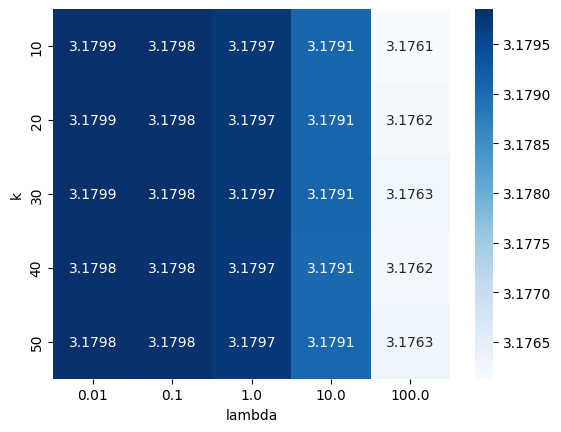

In [25]:
sns.heatmap(av, annot=True, fmt='.4f', cmap='Blues')